# 2020 Meat Price Forecast Update

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('G:\My Drive\Data Science\mds.mplstyle')

from fbprophet import Prophet
import plotly.express as px

In [37]:
forecast = pd.read_csv('Data/intermediate/2019_forecast.csv')

In [38]:
forecast.head(3)

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2010-12-01,4616.620051,3199.019422,4526.519638,4616.620051,4616.620051,-777.094478,-777.094478,-777.094478,...,100.727138,100.727138,100.727138,-877.821616,-877.821616,-877.821616,0.0,0.0,0.0,3839.525573
1,1,2011-01-01,4790.769430,3874.605279,5222.495520,4790.769430,4790.769430,-250.970514,-250.970514,-250.970514,...,100.727138,100.727138,100.727138,-351.697651,-351.697651,-351.697651,0.0,0.0,0.0,4539.798916
2,2,2011-02-01,4964.918809,4436.213966,5729.843629,4964.918809,4964.918809,131.370457,131.370457,131.370457,...,100.727138,100.727138,100.727138,30.643319,30.643319,30.643319,0.0,0.0,0.0,5096.289265


In [39]:
forecast['ds'] = pd.to_datetime(forecast['ds'])

In [40]:
prices = pd.read_csv('Data/raw/Average price of selected commoditiesDT_NSO_0600_019V1_-_2020-10-20_-_www.1212.mn.csv', thousands=',')

In [41]:
prices = pd.melt(prices, id_vars=['Goods and services','Aimag'], var_name='Date', value_name='price')

In [42]:
prices['Date'] = pd.to_datetime(prices['Date'])

In [44]:
beef = prices[prices['Goods and services'] == 'Beef, without bones, kg']

In [46]:
beef

,Goods and services,Aimag,Date,price
1,"Beef, without bones, kg",Ulaanbaatar,2010-12-01,4640.0
4,"Beef, without bones, kg",Ulaanbaatar,2011-01-01,5380.0
7,"Beef, without bones, kg",Ulaanbaatar,2011-02-01,5415.0
10,"Beef, without bones, kg",Ulaanbaatar,2011-03-01,5070.0
13,"Beef, without bones, kg",Ulaanbaatar,2011-04-01,4845.0
...,...,...,...,...
337,"Beef, without bones, kg",Ulaanbaatar,2020-04-01,13760.0
340,"Beef, without bones, kg",Ulaanbaatar,2020-05-01,14436.0
343,"Beef, without bones, kg",Ulaanbaatar,2020-06-01,15105.0
346,"Beef, without bones, kg",Ulaanbaatar,2020-07-01,15077.0


In [45]:
forecast.head(5)

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2010-12-01,4616.620051,3199.019422,4526.519638,4616.620051,4616.620051,-777.094478,-777.094478,-777.094478,...,100.727138,100.727138,100.727138,-877.821616,-877.821616,-877.821616,0.0,0.0,0.0,3839.525573
1,1,2011-01-01,4790.769430,3874.605279,5222.495520,4790.769430,4790.769430,-250.970514,-250.970514,-250.970514,...,100.727138,100.727138,100.727138,-351.697651,-351.697651,-351.697651,0.0,0.0,0.0,4539.798916
2,2,2011-02-01,4964.918809,4436.213966,5729.843629,4964.918809,4964.918809,131.370457,131.370457,131.370457,...,100.727138,100.727138,100.727138,30.643319,30.643319,30.643319,0.0,0.0,0.0,5096.289265
3,3,2011-03-01,5122.215022,4841.483374,6171.345232,5122.215022,5122.215022,384.426749,384.426749,384.426749,...,100.727138,100.727138,100.727138,283.699611,283.699611,283.699611,0.0,0.0,0.0,5506.641771
4,4,2011-04-01,5296.364401,5323.777149,6633.141876,5296.364401,5296.364401,707.176929,707.176929,707.176929,...,100.727138,100.727138,100.727138,606.449792,606.449792,606.449792,0.0,0.0,0.0,6003.541330


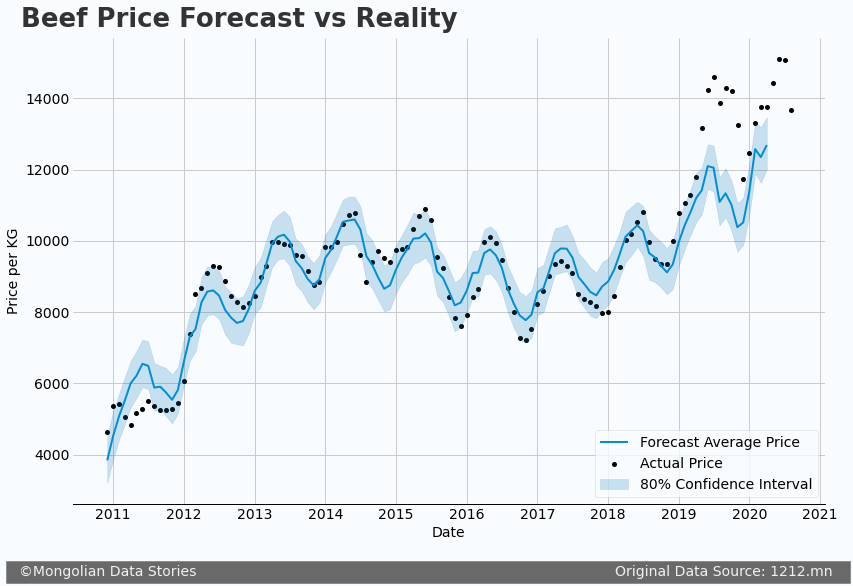

In [55]:
fig, ax = plt.subplots()
ax.plot(forecast['ds'], forecast['yhat'],linewidth=2)
ax.scatter(beef['Date'], beef['price'], c='black',marker='.',linewidths=2)
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='#0072B2', alpha=0.2)

ax.legend(['Forecast Average Price','Actual Price','80% Confidence Interval'], loc=4)

ax.set_xlabel('Date')
ax.set_ylabel('Price per KG')
ax.text(x = 14500, y = 16000, s = 'Beef Price Forecast vs Reality', fontsize=26, weight='bold', alpha=.8)
#ax.text(x = 14500, y = 10700, s= 'Mutton Forecast: May 2019 - May 2020', fontsize=18)
ax.text(x = 14440, y = 600, s = '  ©Mongolian Data Stories                                                                                             Original Data Source: 1212.mn   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Images/forecast_comparison.png', dpi = 300, bbox_inches="tight")

# 2020 Forecast

### Beef Forecast

In [56]:
beef

,Goods and services,Aimag,Date,price
1,"Beef, without bones, kg",Ulaanbaatar,2010-12-01,4640.0
4,"Beef, without bones, kg",Ulaanbaatar,2011-01-01,5380.0
7,"Beef, without bones, kg",Ulaanbaatar,2011-02-01,5415.0
10,"Beef, without bones, kg",Ulaanbaatar,2011-03-01,5070.0
13,"Beef, without bones, kg",Ulaanbaatar,2011-04-01,4845.0
...,...,...,...,...
337,"Beef, without bones, kg",Ulaanbaatar,2020-04-01,13760.0
340,"Beef, without bones, kg",Ulaanbaatar,2020-05-01,14436.0
343,"Beef, without bones, kg",Ulaanbaatar,2020-06-01,15105.0
346,"Beef, without bones, kg",Ulaanbaatar,2020-07-01,15077.0


In [59]:
df = pd.DataFrame(columns=['ds','y'])

In [61]:
df['ds'] = beef['Date']
df['y'] = beef['price']

In [73]:
#df['animal_loss'] = df['animal_loss'].fillna(method='ffill')

In [74]:
#beef['animal_loss'] = beef['animal_loss'].fillna(method='bfill')

In [62]:
df.head()

,ds,y
1,2010-12-01,4640.0
4,2011-01-01,5380.0
7,2011-02-01,5415.0
10,2011-03-01,5070.0
13,2011-04-01,4845.0


In [84]:
b = Prophet(n_changepoints=12)
#b.add_regressor('animal_loss')
b.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
b_future = b.make_future_dataframe(periods=24, freq='M')
#b_future['animal_loss'] = beef['animal_loss']
b_future.head()

,ds
0,2010-12-01
1,2011-01-01
2,2011-02-01
3,2011-03-01
4,2011-04-01


In [86]:
#np.mean(b_future['animal_loss'], axis=0)

In [87]:
#b_future['animal_loss'].fillna(value=np.mean(b_future['animal_loss'], axis=0),inplace=True)

In [88]:
b_forecast = b.predict(b_future)
b_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
136,2022-03-31,18195.184971,16929.803013,19464.205333
137,2022-04-30,18866.992719,17675.465529,20079.561957
138,2022-05-31,19327.680485,17970.457831,20689.937295
139,2022-06-30,19310.963240,17960.458282,20710.077547
140,2022-07-31,18718.988713,17302.027497,20181.587976


In [89]:
b_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

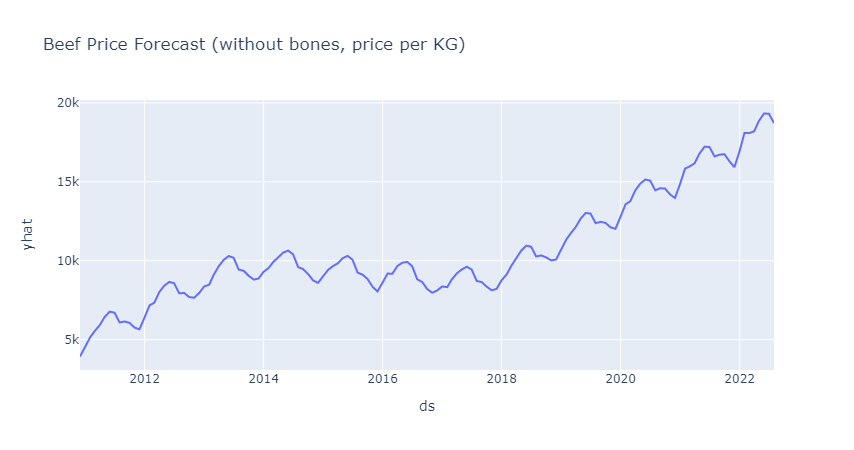

In [90]:
px.line(b_forecast, x='ds', y='yhat', title='Beef Price Forecast (without bones, price per KG)')

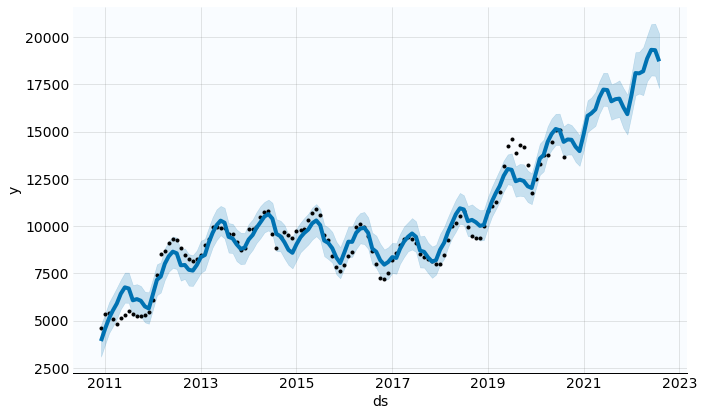

In [91]:
beef_forecast = b.plot(b_forecast)

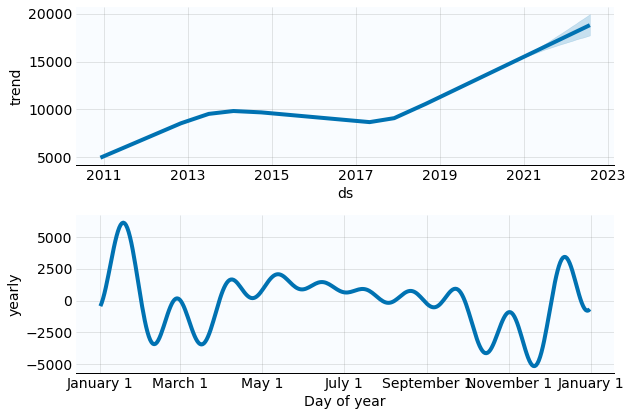

In [92]:
beef_components = b.plot_components(b_forecast)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=defae11f-5e35-45f1-9c6e-497c7dbadc1f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>